# 2.3.3 선형모델

- 선형모델 -> 선형함수를 만들어 예측
- x[0]~x[p]는 하나의 데이터 포인트에 대한 특성
- w,b는 모델이 학습할 파라미터
- y = w[0]*x[0]+b
- w[0]는 기울기, b는 y축과 만나는 절편

In [2]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- 기울기는 대략 0.4

w[0]: 0.393906  b: -0.031804


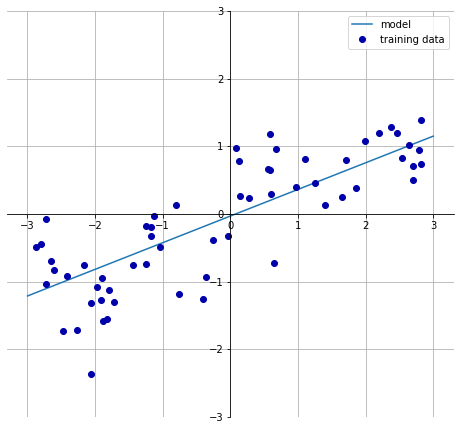

In [3]:
mglearn.plots.plot_linear_regression_wave()

- 회귀를 사용한 선형모델은 특성이 하나일 땐 직선, <br>
두개일 땐 평면, 더 높은 차원에서는 초평면이 되는 특징을 가짐

### 선형 회귀(최소제곱법)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)
# ax + b

In [5]:
print("lr.coef_:",lr.coef_)  #기울기 파라미터
print("lr.intercept_:",lr.intercept_) #절편 파라미터  
# scikit-learn은 훈련데이터에서 유도된 속성은 항상 끝에 밑줄을 붙인다.

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675976


In [6]:
# 과소적합 상태 (점수가 낮지만 둘 다 비슷한 점수다)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [7]:
# 복잡한 데이터셋에서는 과대적합이 적용할 지
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [8]:
# R^2 값이 매우 낮게 나온다. --> 과대적합 --> 복잡도를 제어할 수 있는 모델 사용 --> 리지 회귀
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test,y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


## 리지회귀

In [9]:
# 규제 : 모든 특성이 출력에 주는 여향을 최소한으로 만든다.(기울기를 작게 만든다.)
# -> 과대적합이 되지 않도록 모델을 강제로 제한한다.
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [10]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [11]:
ridge01 = Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test,y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [12]:
# 한글깨짐 해결

In [13]:
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

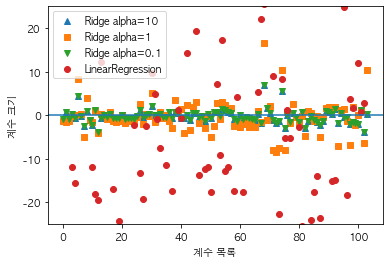

In [14]:
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge01.coef_,'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

### 학습곡선

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

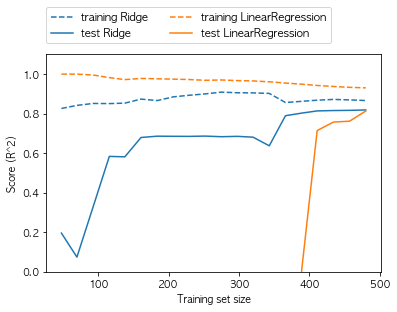

In [15]:
mglearn.plots.plot_ridge_n_samples()

### 라소

In [16]:
# 과소적합 --> 훈련 세트와 테스트 세트 모두 결과가 좋지 않다.
# alpha = 1.0
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 개수:",np.sum(lasso.coef_ != 0))


훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [17]:
# alpha = 0.01 --> 과소적합을 줄이기 위해
# max_iter : 반복 실행하는 최대 횟수
# 알파값을 줄이게 되면 가장 낮은 오차를 찾아가는 반복 횟수가 늘어나게 된다.
# max_iter 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생한다.

lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 개수:",np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [18]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("사용한 특성의 개수:",np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


Text(0, 0.5, '계수 크기')

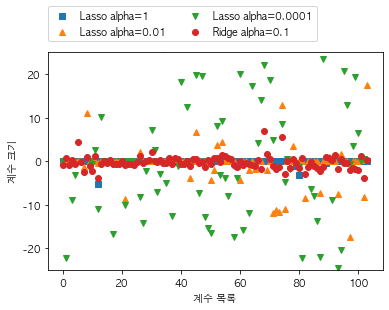

In [19]:
# alpha=0.1인 리지 모델은 alpha=0.01인 라소 모델과 성능이 비슷하지만 리지를 사용하면 어떤 계수도 0이 되지 않는다.

plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o',label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

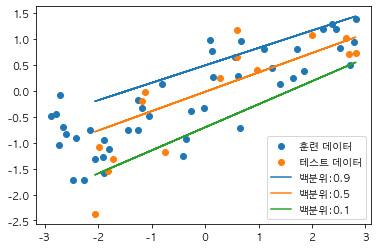

In [20]:
from sklearn.linear_model import QuantileRegressor
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42)
pred_up = QuantileRegressor(quantile=0.9,alpha=0.01).fit(X_train,y_train) \
    .predict(X_test)
pred_med = QuantileRegressor(quantile=0.5,alpha=0.01).fit(X_train,y_train)\
    .predict(X_test)
pred_low = QuantileRegressor(quantile=0.1,alpha=0.01).fit(X_train,y_train)\
    .predict(X_test)

plt.scatter(X_train,y_train,label="훈련 데이터")
plt.scatter(X_test,y_test,label="테스트 데이터")
plt.plot(X_test,pred_up,label="백분위:0.9")
plt.plot(X_test,pred_med,label="백분위:0.5")
plt.plot(X_test,pred_low,label="백분위:0.1")
plt.legend()
plt.show()


## 분류용 선형 모델

- 이진 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기이다.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


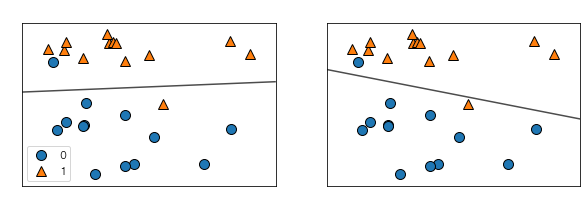

In [23]:
from turtle import color
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,
                                    ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__,color="white")
    ax.set_xlabel("특성 0",color = "white")
    ax.set_ylabel("특성 1",color = "white")

axes[0].legend()
    

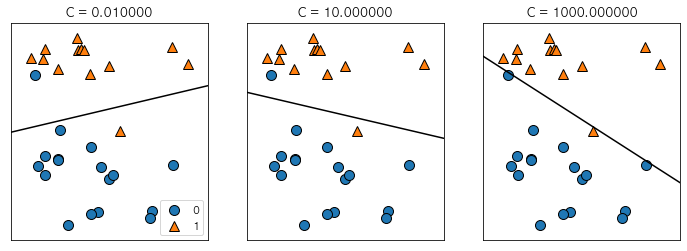

In [24]:
# 서포트 벡터 머신 : 분류를 위한 기준 선을 결정하는 모델
# -> 분류되지 않은 새로운 점이 나타나면 어느 쪽에 속하는지 확인해서 분류 과제를 수행할 수 있게 된다.
mglearn.plots.plot_linear_svc_regularization()

In [26]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수:{:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수:0.958
테스트 세트 점수:0.958


In [28]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수:{:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수:0.984
테스트 세트 점수:0.965


In [29]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수:{:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수:0.953
테스트 세트 점수:0.951


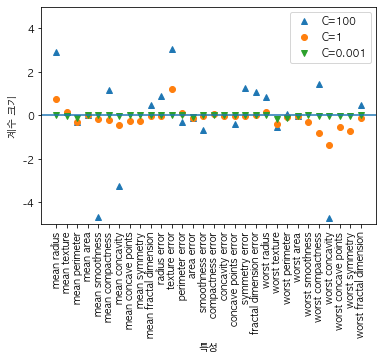

In [34]:
# .T : 전치행렬
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg001.coef_.T,'v',label="C=0.001")
# xticks : 눈금설정
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1]) # 수평선 그리기
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend() # 범례

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


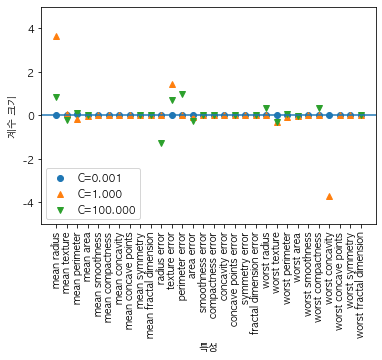

In [36]:
for C,marker in zip([0.001,1,100],['o','^','v']):
  lr_l1=LogisticRegression(solver='liblinear',C=C,penalty="l1",max_iter=1000).fit(X_train,y_train)
  print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
  print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
  plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
  
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.ylim(-5,5)
plt.legend(loc=3)

### 다중 클래스 분류용 선형 모델

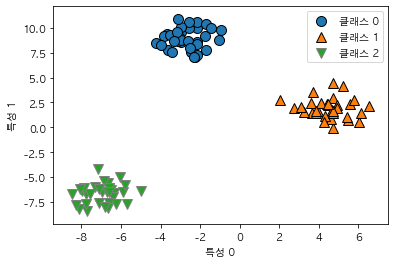

In [37]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0","클래스 1","클래스 2"])

In [38]:
# LinearSVC 분류기로 훈련
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기:",linear_svm.coef_.shape)
print("절편 배열의 크기:",linear_svm.intercept_.shape)

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


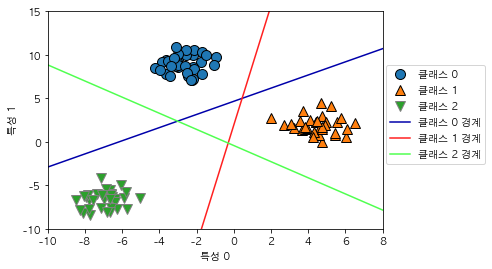

In [44]:
# 2차원 평면의 모든 포인트에 대한 예측 결과
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
  plt.plot(line,-(line*coef[0]+intercept)/coef[1], c= color)
  plt.ylim(-10,15)
  plt.xlim(-10,8)
  plt.xlabel("특성 0")
  plt.ylabel("특성 1")
  plt.legend(["클래스 0","클래스 1","클래스 2","클래스 0 경계","클래스 1 경계","클래스 2 경계"],loc=(1.01,0.3))

Text(0, 0.5, '특성 1')

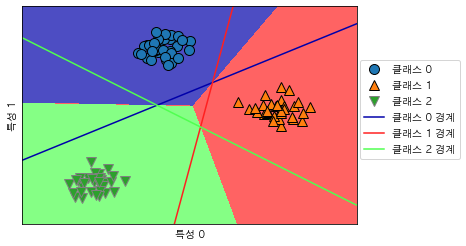

In [45]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
  plt.plot(line,-(line*coef[0]+intercept)/coef[1], c= color)
plt.legend(["클래스 0","클래스 1","클래스 2","클래스 0 경계","클래스 1 경계","클래스 2 경계"],loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")